In [142]:
# импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from matplotlib.ticker import FormatStrFormatter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [143]:
df = pd.read_csv('/Users/natalazeleznak/Downloads/28.6 df_out.csv')
#выведем первые 5 строк датафрейма
df.head() 

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [144]:
#выведем размерность датафрейма
df.shape 

(10000, 20)

# Data Preparation

## Data Cleaning

In [145]:
# Выведем информацию о датафрейме и посмотрим на количество незаполненных значений.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [148]:
#проверим количество полностью заполненных объектов
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))
    
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 9507
Процент полностью заполненных объектов из всей выборки: 95.07


In [149]:
#скопируюем наш датафрейм в другую переменную для дальнейших изменений
df_out = df.copy()

In [150]:
#выведем процент пропущенных значений для каждого признака
missing_values = ((df_out.isna().sum() / len(df_out)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


title_status      1.66
model             1.28
long              0.98
lat               0.98
fuel              0.63
transmission      0.45
year              0.36
posting_date      0.02
description       0.02
image_url         0.02
date              0.02
url               0.00
odometer          0.00
manufacturer      0.00
state             0.00
price             0.00
region_url        0.00
region            0.00
price_category    0.00
id                0.00
dtype: float64

### Заполнение пропусков в title_status

In [151]:
#Обработаем пропуски в столбце title_status
#выведем количество значений, включая пропуски
df_out.title_status.shape

(10000,)

In [152]:
#выведем количество пропущенных значений
df_out.title_status.isna().sum()

166

In [153]:
#выведм описательные статистики
df_out['title_status'].describe()

count      9834
unique        6
top       clean
freq       9518
Name: title_status, dtype: object

In [154]:
#проверим количество уникальных значений в колонке title_status
df_out.title_status.value_counts(dropna=False)

clean         9518
rebuilt        171
NaN            166
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [155]:
#заменим пропуски самым популярным значением clean
df_out.title_status = df_out.title_status.fillna('clean')

In [156]:
#Выведем для обновлённого датафрейма количество пропущенных значений в title_status
print(f'Количество пропущенных значений в title_status: {df_out.title_status.isna().sum()}')

Количество пропущенных значений в title_status: 0


### Заполнение пропусков в model

In [157]:
#выведем количество значений, включая пропущенные значения и количество не заполненных значений
print(df_out.model.shape)
df_out.model.isna().sum()

(10000,)


128

In [158]:
#выведем описательные статистики 
df_out.model.describe()

count      9872
unique     3466
top       f-150
freq        151
Name: model, dtype: object

In [159]:
#Выведем записи, в которых модель автомобиля не заполнена
df_out[df_out.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,gas,85285,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low,2021-04-29 15:50:54+00:00
9616,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,gas,73082,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium,2021-04-09 20:24:23+00:00
9670,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,gas,52536,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low,2021-04-20 08:48:30+00:00
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00


In [160]:
#Если подробнее изучить значения описания автомобиля, то модель автомобиля можно восстановить из описания. 
#Сейчас же обработайте пропуски, заполнив незаполненные значения модели автомобиля значением other
df_out.model = df_out.model.fillna('other')

In [161]:
#Выведем для обновлённого датафрейма количество пропущенных значений в model
print(f'Количество пропущенных значений в model: {df_out.model.isna().sum()}')

Количество пропущенных значений в model: 0


### Заполнение пропусков в long, lat, posting_date, description, image_url, date

In [162]:
#В столбцам long, lat, posting_date строки с пропусками удалим, так как данные не восстановить
#В столбцах description, image_url, date количество пропущенных значений всего 2, поэтому также удалим данные строки

In [163]:
df_out = df_out.dropna(axis='index', how='any', subset=['long', 'lat', 'posting_date', 
                                                        'description', 'image_url', 'date'])

### Заполнение пропусков в fuel

In [164]:
#выведем количество значений, включая пропущенные значения и количество не заполненных значений
print(df_out.fuel.shape)
df_out.fuel.isna().sum()

(9902,)


61

In [165]:
#выведем описательные статистики и проверим количество уникальных значений
print(df_out.fuel.describe())
df_out.fuel.value_counts(dropna=False)

count     9841
unique       5
top        gas
freq      8321
Name: fuel, dtype: object


gas         8321
other        726
diesel       646
hybrid       104
NaN           61
electric      44
Name: fuel, dtype: int64

In [166]:
#заполним незаполненные значения типа топлива значением other
df_out.fuel = df_out.fuel.fillna('other')

In [167]:
#Выведем для обновлённого датафрейма количество пропущенных значений в model
print(f'Количество пропущенных значений в model: {df_out.fuel.isna().sum()}')

Количество пропущенных значений в model: 0


### Заполнение пропусков в transmission

In [168]:
#выведем количество значений, включая пропущенные значения и количество не заполненных значений
print(df_out.transmission.shape)
df_out.transmission.isna().sum()

(9902,)


43

In [169]:
#выведем описательные статистики и проверим количество уникальных значений
print(df_out.transmission.describe())
df_out.transmission.value_counts(dropna=False)

count          9859
unique            3
top       automatic
freq           7610
Name: transmission, dtype: object


automatic    7610
other        1623
manual        626
NaN            43
Name: transmission, dtype: int64

In [170]:
#заполним незаполненные значения КПП значением other
df_out.transmission = df_out.transmission.fillna('other')

### Заполнение пропусков в year

In [171]:
#выведем количество значений, включая пропущенные значения и количество не заполненных значений
print(df_out.year.shape)
df_out.year.isna().sum()

(9902,)


34

In [172]:
#выведем записи, где год не указан
df_out[df_out.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,other,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,other,59246,clean,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,other,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1845,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


In [173]:
# посмотрев на таблицу можно понять, что в колонке "description" почти везде указан год 
# можно все пропущенные значения заменить на 2019, среднее из того, что можно найти в описании
df_out.year = df_out.year.fillna(2019)

In [174]:
#проверим, что не осталось пустых значений
missing_values = ((df_out.isna().sum() / len(df_out)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


id                0.0
url               0.0
price_category    0.0
posting_date      0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
title_status      0.0
odometer          0.0
fuel              0.0
model             0.0
manufacturer      0.0
year              0.0
price             0.0
region_url        0.0
region            0.0
date              0.0
dtype: float64

### Преобразование типа данных в годе выпуска автомобиля

In [175]:
#выведем описательные статистики
df_out.year.describe()

count    9902.000000
mean     2010.937487
std         9.700860
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [176]:
#изменим тип данных на целочисленный 
df_out.year = df_out.year.astype(int)
df_out.year.dtype

dtype('int64')

### Преобразование типа данных в категориальных переменных

In [177]:
#Выведем тип данных
df_out.fuel.dtype

dtype('O')

In [178]:
#преобразуем тип данных в category
df_out.fuel = df_out.fuel.astype("category")
df_out.fuel

0       diesel
1        other
2          gas
3          gas
4          gas
         ...  
9995       gas
9996       gas
9997       gas
9998    hybrid
9999       gas
Name: fuel, Length: 9902, dtype: category
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']

In [179]:
#проверим тип данных
df_out.fuel.dtype

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False)

### Выбросы в годе выпуска

In [180]:
#Выведем описательные статистики для года выпуска автомобиля
df_out.year.describe()

count    9902.000000
mean     2010.937487
std         9.700860
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [181]:
#Выведем границы для нормальных значений года выпуска, используя интерквартильный размах
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [182]:
boundaries = calculate_outliers(df_out.year)
boundaries

(1994.5, 2030.5)

In [183]:
#посчитаем и выведем количество выбросов в годе выпуска автомобиля
is_outlier = (df_out.year < boundaries[0]) | (df_out.year > boundaries[1]) 
is_outlier.sum()

394

In [184]:
#Так как выбросы в годе выпуска находятся среди минимальных значений, заполним те значения, которые являются выбросами,
#значением нижней границы.
df_out.loc[is_outlier, 'year'] = int(boundaries[0])

In [185]:
#Выведите ещё раз описательные статистики для года выпуска автомобиля, 
#чтобы проверить, что теперь все значения года входят в границы нормальных значений
df_out.year.describe()

count    9902.000000
mean     2011.683599
std         6.533898
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

## Data Visualization

### Выявление аномалий в стоимости автомобиля

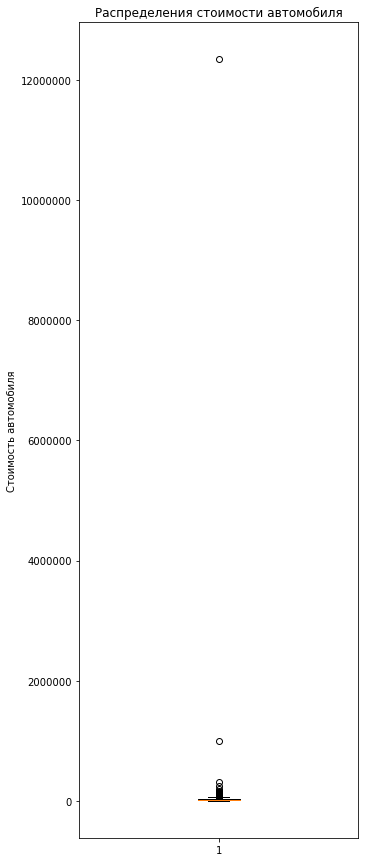

In [186]:
#Построим распеделение стоимости автомобиля для возможного наличия выбросов
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df_out.price)
ax.set_ylabel('Стоимость автомобиля')
ax.set_title('Распределения стоимости автомобиля')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [187]:
#Из "ящика с усами" можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика 
#почти незаметна. Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы "ящика"
df_out.price.describe().apply(lambda x: f"{x:0.3f}")

count        9902.000
mean        20684.198
std        125234.367
min           500.000
25%          7880.000
50%         15592.500
75%         27990.000
max      12345678.000
Name: price, dtype: object

In [188]:
# Выведем границы для нормальных значений стоимости автомобиля, используя интерквартильный размах
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [189]:
boundaries = calculate_outliers(df_out.price)
boundaries

(-22285.0, 58155.0)

In [190]:
#минимальное значение входит в граница нормальных значений стоимости автомобиля, а максимальное значение нет
#посчитаем количество выбросов в стоимости автомобиля
outlier = (df_out.price < boundaries[0]) | (df_out.price > boundaries[1]) 
outlier.sum()

215

In [191]:
# Выведем записи, в которых стоимость автомобиля попадает в выбросы, чтобы их проанализировать
# выводим последние 20 записей отсортированных по увеличению цены
df_out[outlier].sort_values('price').tail(20)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
991,7301597930,https://akroncanton.craigslist.org/ctd/d/akron...,akron / canton,https://akroncanton.craigslist.org,104999,2021,cadillac,escalade,gas,480,clean,automatic,https://images.craigslist.org/01313_buG2wwU4bM...,2021 CADILLAC ESCALADE PREMIUM LUXURY SUV Gu...,oh,41.038965,-81.575742,2021-04-04T07:00:29-0400,high,2021-04-04 11:00:29+00:00
8089,7316159639,https://cincinnati.craigslist.org/cto/d/ft-mit...,cincinnati,https://cincinnati.craigslist.org,109500,2020,chevrolet,corvette,gas,450,clean,other,https://images.craigslist.org/01717_hm6u6Psyco...,"2020 C8 Elkhart Lake Blue Black Interior 2LT, ...",oh,39.030000,-84.559000,2021-05-03T09:50:21-0400,high,2021-05-03 13:50:21+00:00
9811,7312788253,https://nh.craigslist.org/ctd/d/methuen-2004-r...,new hampshire,https://nh.craigslist.org,109995,2004,other,ROLLS ROYCE PHANTOM,gas,26000,clean,automatic,https://images.craigslist.org/00a0a_aF4tYDmAxB...,2004 Rolls-Royce Phantom Base 4dr Sedan Of...,nh,42.756205,-71.210258,2021-04-26T10:43:42-0400,high,2021-04-26 14:43:42+00:00
2087,7315309821,https://nh.craigslist.org/ctd/d/methuen-2004-r...,new hampshire,https://nh.craigslist.org,109995,2004,other,ROLLS ROYCE PHANTOM,gas,26000,clean,automatic,https://images.craigslist.org/00a0a_aF4tYDmAxB...,2004 Rolls-Royce Phantom Base 4dr Sedan Of...,nh,42.756205,-71.210258,2021-05-01T11:25:28-0400,high,2021-05-01 15:25:28+00:00
4469,7308293412,https://kalispell.craigslist.org/cto/d/columbi...,kalispell,https://kalispell.craigslist.org,119966,1994,chevrolet,corvette sting ray,gas,56455,clean,manual,https://images.craigslist.org/00000_4T3r43W3Fu...,DO NOT NEED HELP SELLING – DON’T ASK! Selling...,mt,48.404000,-114.350900,2021-04-17T10:28:02-0600,high,2021-04-17 16:28:02+00:00
4133,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021,chevrolet,corvette c8 z51,gas,10,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,35.081800,-106.648200,2021-04-24T08:38:45-0600,high,2021-04-24 14:38:45+00:00
1699,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1994,other,cadvwrambuick,gas,283466,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,46.735200,-117.172900,2021-04-07T15:57:23-0700,high,2021-04-07 22:57:23+00:00
9194,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006,jeep,wrangler,gas,12345,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,38.025845,-87.596457,2021-04-18T09:55:42-0500,high,2021-04-18 14:55:42+00:00
3006,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018,mercedes-benz,benz amg gt c,gas,4000,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,30.122300,-81.362700,2021-04-17T16:48:42-0400,high,2021-04-17 20:48:42+00:00
5149,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007,ferrari,f430 spider,gas,12351,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,42.756205,-71.210258,2021-04-29T14:45:08-0400,high,2021-04-29 18:45:08+00:00


In [192]:
#Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить,
#в первучю очередь, производителем и низким пробегом. 
#Но будем опираться на стоимость основной массы автомобилей, поэтому удалим все аномальные значения
#результат запишем и проверим как изменился график "ящик с усами"
df_out = df_out[outlier == False]

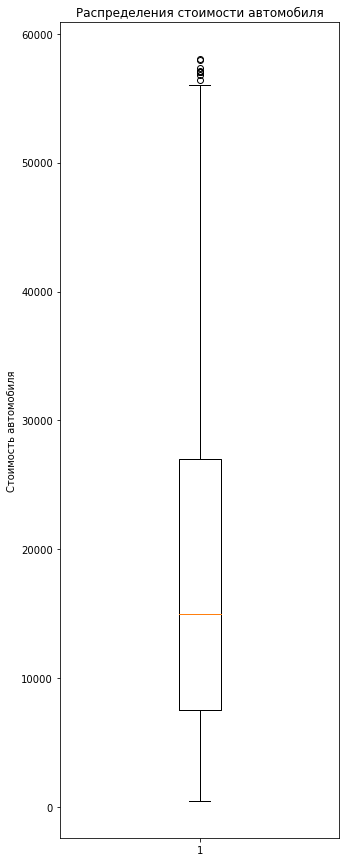

In [193]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df_out.price)
ax.set_ylabel('Стоимость автомобиля')
ax.set_title('Распределения стоимости автомобиля')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Feature Engineering

## Генерация дополнительных фичей

In [194]:
#Выведем список значений и количество уникальных значений для модели автомобиля
print(df_out.model)
df.model.nunique()

0          2500 crew cab big horn
1            explorer 4wd 4dr xlt
2                golf r hatchback
3                            rav4
4                          altima
                  ...            
9995                         rav4
9996                     wrangler
9997    a3 2.0t premium plus pzev
9998                      cayenne
9999       1500 crew cab big horn
Name: model, Length: 9687, dtype: object


3466

In [195]:
#Уникальных значений много. Попробуем их сократить, оставив только первое слово в наименовании модели
df_out['short_model'] = df_out.model.apply(lambda x: x.lower().split(' ')[0])
print(df_out['short_model'])
df_out['short_model'].nunique()

0           2500
1       explorer
2           golf
3           rav4
4         altima
          ...   
9995        rav4
9996    wrangler
9997          a3
9998     cayenne
9999        1500
Name: short_model, Length: 9687, dtype: object


919

In [196]:
#мы сократили количество уникальных значений более, чем в 3 раза

## Преобразование категориальных переменных

In [197]:
#распечатаем наименование категории и количество уникальных значений
print(df_out[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status']].value_counts())
df_out[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status']].nunique()

short_model  transmission  region                  manufacturer  state  title_status
silverado    automatic     kansas city, MO         chevrolet     ks     clean           8
                           bakersfield             chevrolet     ca     clean           6
accord       automatic     stockton                honda         ca     clean           6
silverado    automatic     oklahoma city           chevrolet     ok     clean           6
                           omaha / council bluffs  chevrolet     ia     clean           6
                                                                                       ..
explorer     automatic     albuquerque             ford          nm     clean           1
expedition   other         worcester / central MA  ford          ma     clean           1
                           tyler / east TX         ford          tx     clean           1
                           shreveport              ford          la     clean           1
zx2          ma

short_model     919
transmission      3
region          393
manufacturer     40
state            51
title_status      6
dtype: int64

In [198]:
#Создадим датафрейм data, содержащий только выбранные категориальные переменные.
data = df_out[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status']]
data

,short_model,transmission,region,manufacturer,state,title_status
0,2500,other,chattanooga,ram,tn,clean
1,explorer,automatic,north jersey,ford,nj,clean
2,golf,other,reno / tahoe,volkswagen,ca,clean
3,rav4,automatic,fayetteville,toyota,nc,clean
4,altima,automatic,new york city,nissan,ny,clean
...,...,...,...,...,...,...
9995,rav4,automatic,chautauqua,toyota,ny,clean
9996,wrangler,other,binghamton,jeep,ny,clean
9997,a3,automatic,salem,audi,or,clean
9998,cayenne,automatic,madison,porsche,wi,clean


In [199]:
#Создадим объект класса OneHotEncoder, который будет отвечать за преобразование
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

In [200]:
#Идентифицируем параметры преобразования на датафрейме с категориальными переменными.
ohe.fit(data)

OneHotEncoder(sparse=False)

In [201]:
#Применим преобразование для датафрейма с категориальными переменными и сохраним в новую переменную
ohe_data = ohe.transform(data)
ohe_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [202]:
#Выведем новые наименования признаков
ohe.get_feature_names()

array(['x0_-benz', 'x0_1', 'x0_124', ..., 'x5_parts only', 'x5_rebuilt',
       'x5_salvage'], dtype=object)

In [203]:
#Добавим в исходный датафрейм получившиеся новые признаки
df_out[ohe.get_feature_names()] = ohe_data
df_out.head()

/Users/natalazeleznak/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x4_wa,x4_wi,x4_wv,x4_wy,x5_clean,x5_lien,x5_missing,x5_parts only,x5_rebuilt,x5_salvage
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [204]:
#Посмотрим на результат обратного преобразования получившейся матрицы в исходные признаки
ohe.inverse_transform(ohe_data)

array([['2500', 'other', 'chattanooga', 'ram', 'tn', 'clean'],
       ['explorer', 'automatic', 'north jersey', 'ford', 'nj', 'clean'],
       ['golf', 'other', 'reno / tahoe', 'volkswagen', 'ca', 'clean'],
       ...,
       ['a3', 'automatic', 'salem', 'audi', 'or', 'clean'],
       ['cayenne', 'automatic', 'madison', 'porsche', 'wi', 'clean'],
       ['1500', 'other', 'norfolk / hampton roads', 'ram', 'va', 'clean']],
      dtype=object)

## Стандартизация данных

In [205]:
# Создадим переменную под количественные переменные
number = ['lat', 'long', 'year', 'odometer']

In [206]:
# создадим датафрейм data, содержащий только выбранные количественные переменные
data2 = df_out[number]
data2

,lat,long,year,odometer
0,35.060000,-85.250000,2020,27442
1,40.821805,-74.061962,2016,60023
2,33.779214,-84.411811,2017,14048
3,35.715954,-78.655304,2013,117291
4,40.654800,-73.609700,2021,8000
...,...,...,...,...
9995,42.123900,-79.189500,2002,150000
9996,43.216990,-77.755610,2008,113573
9997,44.925908,-122.982753,2011,150184
9998,43.029559,-89.397796,2015,61943


In [207]:
#cоздадим объект класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.
#и идентифицируем параметры преобразования на датафрейме с количественными переменными.
std_scaler = StandardScaler()
std_scaler.fit(data2)

StandardScaler()

In [208]:
#Применим преобразование для датафрейма с количественными переменными
std_scaled_1 = std_scaler.transform(data2)
std_scaled_1

array([[-0.61729383,  0.48674713,  1.29373247, -1.06707492],
       [ 0.38922471,  1.11291572,  0.67933957, -0.54969994],
       [-0.84103186,  0.53365863,  0.83293779, -1.279767  ],
       ...,
       [ 1.10616251, -1.62506769, -0.08865156,  0.88202548],
       [ 0.77489298,  0.25460459,  0.52574134, -0.519211  ],
       [-0.33604605,  0.98765791,  0.83293779, -0.93243134]])

In [209]:
#Создадим наименования новых признаков и добавим их в исходный датафрейм
number_std = ['lat_std', 'long_std', 'year_std', 'odometer_std']
df_out[number_std] = std_scaled_1
df_out.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x5_clean,x5_lien,x5_missing,x5_parts only,x5_rebuilt,x5_salvage,lat_std,long_std,year_std,odometer_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.617294,0.486747,1.293732,-1.067075
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,1.0,0.0,0.0,0.0,0.0,0.0,0.389225,1.112916,0.679340,-0.549700
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.841032,0.533659,0.832938,-1.279767
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.502707,0.855837,0.218545,0.359696
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.360051,1.138228,1.447331,-1.375807


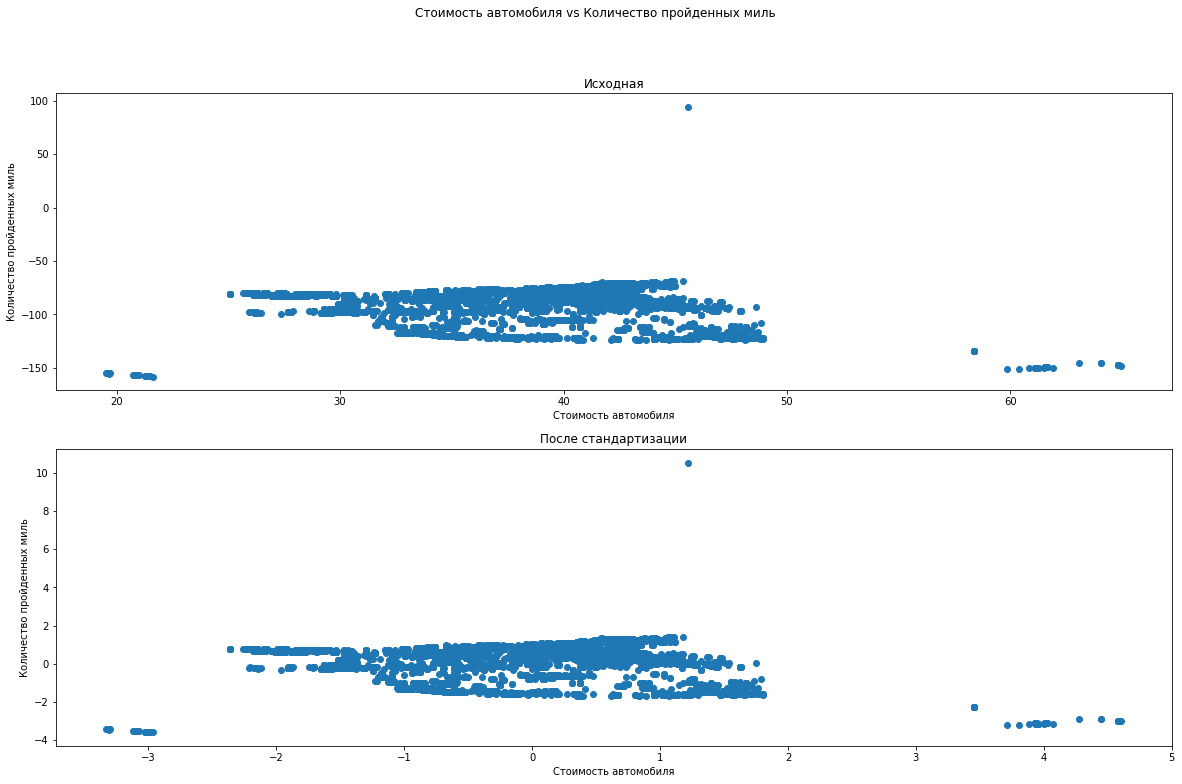

In [210]:
#проверим зависимость до и после стандартизации
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

ax1.scatter(df_out.lat, df_out.long)
ax1.set_title('Исходная')
ax1.set_ylabel('Количество пройденных миль')
ax1.set_xlabel('Стоимость автомобиля')


ax2.scatter(df_out.lat_std, df_out.long_std)
ax2.set_title('После стандартизации')
ax2.set_ylabel('Количество пройденных миль')
ax2.set_xlabel('Стоимость автомобиля')

fig.suptitle('Стоимость автомобиля vs Количество пройденных миль');

In [211]:
#исхоодя из графиков, можно сказать, что преобразование не повлияло на зависимость между переменными

## Сохранение датафрейма для этапа моделирования

In [212]:
#Удалим колонки, которые были исходными для формирования признаков
columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'date', 'short_model']

df_out = df_out.drop(axis = 1, columns = columns_for_drop)

In [213]:
df_out

,id,price,price_category,x0_-benz,x0_1,x0_124,x0_128i,x0_135i,x0_1500,x0_163869,...,x5_clean,x5_lien,x5_missing,x5_parts only,x5_rebuilt,x5_salvage,lat_std,long_std,year_std,odometer_std
0,7308295377,54990,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.617294,0.486747,1.293732,-1.067075
1,7316380095,16942,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.389225,1.112916,0.679340,-0.549700
2,7313733749,35590,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.841032,0.533659,0.832938,-1.279767
3,7308210929,14500,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.502707,0.855837,0.218545,0.359696
4,7316474668,21800,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.360051,1.138228,1.447331,-1.375807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7304876387,4495,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.616685,0.825939,-1.471036,0.879104
9996,7316152972,14495,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.807635,0.906191,-0.549446,0.300655
9997,7310993818,8995,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.106163,-1.625068,-0.088652,0.882025
9998,7306637427,31900,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.774893,0.254605,0.525741,-0.519211


# Modelling

In [217]:
# Удалим колонки, которые косвенно косвенно содержат информацию о целевой переменной
df_model = df_out.drop(['price'], axis=1)

In [223]:
x = df_model.drop(['price_category', 'id'], axis=1)
y = df_model['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Логистическая регрессия

In [228]:
logreg = LogisticRegression(class_weight = 'balanced', penalty='none', max_iter = 500)
logreg.fit(x_train, y_train)

/Users/natalazeleznak/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=500, penalty='none')

In [229]:
# рассчитаем метрику качества на тренировочной выборке
accuracy_score(y_train, logreg.predict(x_train))

0.8849557522123894

In [230]:
# сделаем предикт на тестовых данных
logreg_pred = logreg.predict(x_test)

In [231]:
# рассчитаем и выведем accuracy и confusion_matrix на тестовой выборке
print(accuracy_score(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))

0.7540419676642587
[[809  29 144]
 [ 36 752 181]
 [152 173 631]]


## Cлучайный лес

In [232]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [233]:
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)

In [234]:
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.7619539043687651


## Многослойный персептрон

In [235]:
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [236]:
predicted_train_mlp = mlp.predict(x_train)
predicted_test_mlp = mlp.predict(x_test)

In [237]:
print(accuracy_score(y_train, predicted_train_mlp))
print(accuracy_score(y_test, predicted_test_mlp))

0.9982300884955753
0.7650498796009632


## Кросс-валидация для каждой модели

In [243]:
#для логистической регрессии
cross_validate(logreg, x, y, cv=12)

/Users/natalazeleznak/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/natalazeleznak/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

{'fit_time': array([4.89873099, 4.8672452 , 5.26424217, 5.13022017, 5.12779188,
        5.16250587, 5.09938669, 5.30332708, 5.24865532, 5.27870011,
        5.29804802, 5.76713276]),
 'score_time': array([0.00947881, 0.00953484, 0.00973606, 0.0101819 , 0.00964904,
        0.00963807, 0.01006794, 0.010288  , 0.00975394, 0.01001382,
        0.01036906, 0.01047707]),
 'test_score': array([0.75866337, 0.78094059, 0.76980198, 0.77695167, 0.75216853,
        0.75836431, 0.77571252, 0.755886  , 0.76084263, 0.74845105,
        0.78438662, 0.78066914])}

In [244]:
cv_score = cross_val_score(logreg, x, y, cv=10,)

/Users/natalazeleznak/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/natalazeleznak/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [245]:
cv_score.mean(), cv_score.std()

(0.7665952374860339, 0.008755016806801729)

In [239]:
#для многослойного персептрона
print(accuracy_score(y_train, predicted_train_mlp))
print(accuracy_score(y_test, predicted_test_mlp))

0.9982300884955753
0.7650498796009632


In [240]:
#для случайного леса
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.7619539043687651


# Results